In [1]:
#-*- coding:utf-8 -*-
import pandas as pd
import seaborn as sns
price = pd.read_csv('./data/pepper_price.csv')

path = 'data/pepper_supply/pepper'
o00 = pd.read_excel('./{}_00.xlsx'.format(path))
o01 = pd.read_excel('./{}_01.xlsx'.format(path))
o02 = pd.read_excel('./{}_02.xlsx'.format(path))
o03 = pd.read_excel('./{}_03.xlsx'.format(path))
o04 = pd.read_excel('./{}_04.xlsx'.format(path))
o05 = pd.read_excel('./{}_05.xlsx'.format(path))
o06 = pd.read_excel('./{}_06.xlsx'.format(path))
o07 = pd.read_excel('./{}_07.xlsx'.format(path))
o08 = pd.read_excel('./{}_08.xlsx'.format(path))
o09 = pd.read_excel('./{}_09.xlsx'.format(path))
o10 = pd.read_excel('./{}_10.xlsx'.format(path))
o11 = pd.read_excel('./{}_11.xlsx'.format(path))
o12 = pd.read_excel('./{}_12.xlsx'.format(path))
o13 = pd.read_excel('./{}_13.xlsx'.format(path))
o14 = pd.read_excel('./{}_14.xlsx'.format(path))
o15 = pd.read_excel('./{}_15.xlsx'.format(path))
o16 = pd.read_excel('./{}_16.xlsx'.format(path))
o17 = pd.read_excel('./{}_17.xlsx'.format(path))
o18 = pd.read_excel('./{}_18.xlsx'.format(path))
o19 = pd.read_excel('./{}_19.xlsx'.format(path))

product = pd.concat([o00, o01, o02, o03, o04, o05, o06, o07, o08, o09, o10, o11, o12, o13, o14, o15, o16, o17, o18, o19])
product.head(10)

,거래년월일,품목명,시장코드,시장명,출하지코드,출하지명,거래량,품목코드
0,총 합계,전체,NaN,NaN,NaN,NaN,"79,211",NaN
1,소계,건고추(일반),NaN,NaN,NaN,NaN,"79,211",120701.0
2,20001230,건고추(일반),210001.0,부산엄궁도매시장,356010,충청남도서산시동문동,"5,100",120701.0
3,20001229,건고추(일반),311201.0,구리도매시장,501000,광주동구,60,120701.0
4,20001229,건고추(일반),210001.0,부산엄궁도매시장,621010,경상남도김해시부원동,"4,500",120701.0
5,20001228,건고추(일반),311201.0,구리도매시장,501000,광주동구,40,120701.0
6,20001228,건고추(일반),210001.0,부산엄궁도매시장,621010,경상남도김해시부원동,"5,000",120701.0
7,20001227,건고추(일반),310401.0,안양도매시장,367805,충청북도괴산군괴산읍,600,120701.0
8,20001226,건고추(일반),310401.0,안양도매시장,390011,충청북도제천시중앙로1가,600,120701.0
9,20001223,건고추(일반),311201.0,구리도매시장,520000,전라남도나주시,40,120701.0


In [2]:
product['year'] = product['거래년월일'].apply(lambda x: str(x)[:4]).astype(str)
product['month'] = product['거래년월일'].apply(lambda x: str(x)[4:6]).astype(str)
product['거래량'] = product['거래량'].apply(lambda x: ''.join(str(x).split(','))).astype(int) 
df = product[['year', 'month','거래량']]
total = df.groupby(['year','month'], as_index=False).sum()
total.head(10)

,year,month,거래량
0,2000,01,1170
1,2000,02,6369
2,2000,03,1947
3,2000,04,432
4,2000,05,858
5,2000,06,83
6,2000,07,773
7,2000,08,5929
8,2000,09,7101
9,2000,10,13081


In [3]:
total = total[:-2]
cat = pd.concat([price, total], axis=1)
result = cat[['year','month','거래량','가격']]
result.tail(10)

,year,month,거래량,가격
230,2019,03,14868,22470
231,2019,04,12081,22320
232,2019,05,13297,22312
233,2019,06,7617,22092
234,2019,07,8145,21827
235,2019,08,53650,20445
236,2019,09,45879,19895
237,2019,10,57138,18825
238,2019,11,17042,18698
239,2019,12,15780,18788


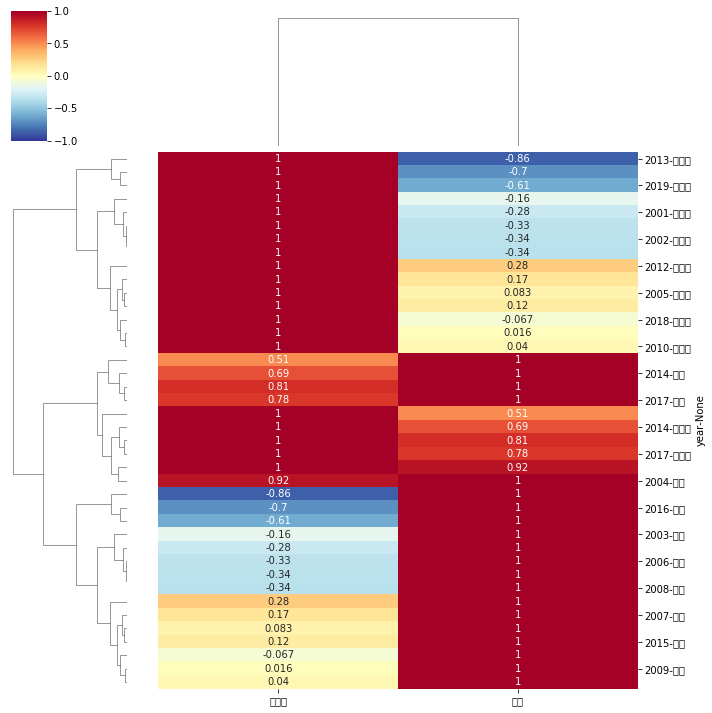

In [4]:
df = result.groupby('year').corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
# [출처] 상관관계 분석 시각화 - correlation matrix (df.corr, sns.heatmap)|작성자 데이터공방

In [5]:
cor_result = {'2000':0.511, '2001':-0.283, '2002':-0.343, '2003':-0.161, '2004':0.917, '2005':0.082, '2006':-0.331, '2007':0.166, '2008':-0.344, '2009':0.015, '2010':0.039,'2011':0.039,'2012':0.276,'2013':-0.862,'2014':0.689,'2015':0.119,'2016':-0.695,'2017':0.776,'2018':-0.066,'2019':-0.607}
cor_result

{'2000': 0.511,
 '2001': -0.283,
 '2002': -0.343,
 '2003': -0.161,
 '2004': 0.917,
 '2005': 0.082,
 '2006': -0.331,
 '2007': 0.166,
 '2008': -0.344,
 '2009': 0.015,
 '2010': 0.039,
 '2011': 0.039,
 '2012': 0.276,
 '2013': -0.862,
 '2014': 0.689,
 '2015': 0.119,
 '2016': -0.695,
 '2017': 0.776,
 '2018': -0.066,
 '2019': -0.607}

/home/florence/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


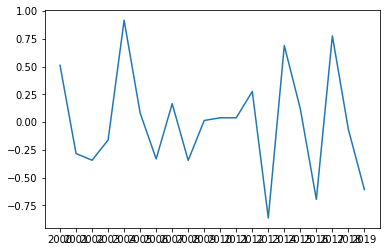

In [6]:
import matplotlib.pyplot as plt
dates = list(cor_result.keys())          
prices = list(cor_result.values())       
plt.plot_date(dates, prices, '-') 

In [7]:
sorted_cor = {k: v for k, v in sorted(cor_result.items(), key=lambda item: item[1])}
sorted_cor

{'2013': -0.862,
 '2016': -0.695,
 '2019': -0.607,
 '2008': -0.344,
 '2002': -0.343,
 '2006': -0.331,
 '2001': -0.283,
 '2003': -0.161,
 '2018': -0.066,
 '2009': 0.015,
 '2010': 0.039,
 '2011': 0.039,
 '2005': 0.082,
 '2015': 0.119,
 '2007': 0.166,
 '2012': 0.276,
 '2000': 0.511,
 '2014': 0.689,
 '2017': 0.776,
 '2004': 0.917}

{'s_m': 1, 'm_m': 2, 'w_m': 6, 'w_p': 7, 'm_p': 2, 's_p': 2}


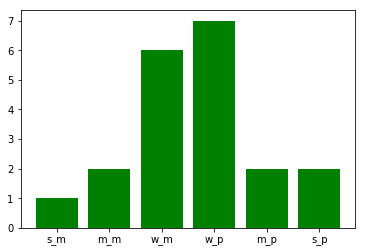

In [8]:
cor_dict = {'s_m':0, 'm_m':0, 'w_m':0, 'w_p':0, 'm_p':0, 's_p':0}
for key, value in sorted_cor.items():
    if value < -0.7:
        cor_dict['s_m'] += 1
    elif -0.7 <= value and value < -0.4:
        cor_dict['m_m'] += 1
    elif -0.4 <= value and value < 0:
        cor_dict['w_m'] += 1
    elif 0 <= value and value < 0.4:
        cor_dict['w_p'] += 1
    elif 0.4 <= value and value < 0.7:
        cor_dict['m_p'] += 1
    else:
        cor_dict['s_p'] += 1
plt.bar(cor_dict.keys(), cor_dict.values(), color='g')
print(cor_dict)

In [9]:
price = pd.read_csv('./data/garlic_price.csv')

path = 'data/garlic_supply/garlic'
o00 = pd.read_excel('./{}_00.xlsx'.format(path))
o01 = pd.read_excel('./{}_01.xlsx'.format(path))
o02 = pd.read_excel('./{}_02.xlsx'.format(path))
o03 = pd.read_excel('./{}_03.xlsx'.format(path))
o04 = pd.read_excel('./{}_04.xlsx'.format(path))
o05 = pd.read_excel('./{}_05.xlsx'.format(path))
o06 = pd.read_excel('./{}_06.xlsx'.format(path))
o07 = pd.read_excel('./{}_07.xlsx'.format(path))
o08 = pd.read_excel('./{}_08.xlsx'.format(path))
o09 = pd.read_excel('./{}_09.xlsx'.format(path))
o10 = pd.read_excel('./{}_10.xlsx'.format(path))
o11 = pd.read_excel('./{}_11.xlsx'.format(path))
o12 = pd.read_excel('./{}_12.xlsx'.format(path))
o13 = pd.read_excel('./{}_13.xlsx'.format(path))
o14 = pd.read_excel('./{}_14.xlsx'.format(path))
o15 = pd.read_excel('./{}_15.xlsx'.format(path))
o16 = pd.read_excel('./{}_16.xlsx'.format(path))
o17 = pd.read_excel('./{}_17.xlsx'.format(path))
o18 = pd.read_excel('./{}_18.xlsx'.format(path))
o19 = pd.read_excel('./{}_19.xlsx'.format(path))

product = pd.concat([o00, o01, o02, o03, o04, o05, o06, o07, o08, o09, o10, o11, o12, o13, o14, o15, o16, o17, o18, o19])
product['year'] = product['거래년월일'].apply(lambda x: str(x)[:4]).astype(str)
product['month'] = product['거래년월일'].apply(lambda x: str(x)[4:6]).astype(str)
product['거래량'] = product['거래량'].apply(lambda x: ''.join(str(x).split(','))).astype(int) 
df = product[['year', 'month','거래량']]
total = df.groupby(['year','month'], as_index=False).sum()
total = total[:-2]
cat = pd.concat([price, total], axis=1)
result = cat[['year','month','거래량','가격']]
result.groupby('year').corr()

거래량        가격
year                        
2000 거래량  1.000000  0.055128
     가격   0.055128  1.000000
2001 거래량  1.000000 -0.871584
     가격  -0.871584  1.000000
2002 거래량  1.000000  0.227277
     가격   0.227277  1.000000
2003 거래량  1.000000 -0.129744
     가격  -0.129744  1.000000
2004 거래량  1.000000  0.157407
     가격   0.157407  1.000000
2005 거래량  1.000000  0.125966
     가격   0.125966  1.000000
2006 거래량  1.000000 -0.708191
     가격  -0.708191  1.000000
2007 거래량  1.000000  0.381387
     가격   0.381387  1.000000
2008 거래량  1.000000 -0.415932
     가격  -0.415932  1.000000
2009 거래량  1.000000 -0.387148
     가격  -0.387148  1.000000
2010 거래량  1.000000 -0.229662
     가격  -0.229662  1.000000
2011 거래량  1.000000 -0.071673
     가격  -0.071673  1.000000
2012 거래량  1.000000 -0.051405
     가격  -0.051405  1.000000
2013 거래량  1.000000 -0.056765
     가격  -0.056765  1.000000
2014 거래량  1.000000 -0.337286
     가격  -0.337286  1.000000
2015 거래량  1.000000 -0.309783
     가격  -0.309783  1.000000
2016 거래량  1.000000  0.603789
     가격   0.603789  1.000000
2017 거래량  1.000000  0.170709
     가격   0.170709  1.000000
2018 거래량  1.000000  0.363257
     가격   0.363257  1.000000
2019 거래량  1.000000  0.333085
     가격   0.333085  1.000000

In [10]:
cor_result = {'2000':0.055, '2001':-0.871, '2002':0.227, '2003':-0.129, '2004':0.157, '2005':0.125, '2006':-0.708,
              '2007':0.381, '2008':-0.415, '2009':-0.387, '2010':-0.229,'2011':-0.071,'2012':-0.051,'2013':-0.056,
              '2014':-0.337,'2015':-0.309,'2016':0.603,'2017':0.170,'2018':0.363,'2019':0.333}
cor_result

{'2000': 0.055,
 '2001': -0.871,
 '2002': 0.227,
 '2003': -0.129,
 '2004': 0.157,
 '2005': 0.125,
 '2006': -0.708,
 '2007': 0.381,
 '2008': -0.415,
 '2009': -0.387,
 '2010': -0.229,
 '2011': -0.071,
 '2012': -0.051,
 '2013': -0.056,
 '2014': -0.337,
 '2015': -0.309,
 '2016': 0.603,
 '2017': 0.17,
 '2018': 0.363,
 '2019': 0.333}

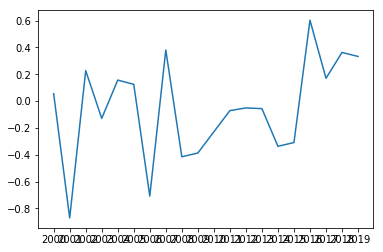

In [11]:
dates = list(cor_result.keys())          
prices = list(cor_result.values())       
plt.plot_date(dates, prices, '-') 

In [12]:
sorted_cor = {k: v for k, v in sorted(cor_result.items(), key=lambda item: item[1])}
sorted_cor

{'2001': -0.871,
 '2006': -0.708,
 '2008': -0.415,
 '2009': -0.387,
 '2014': -0.337,
 '2015': -0.309,
 '2010': -0.229,
 '2003': -0.129,
 '2011': -0.071,
 '2013': -0.056,
 '2012': -0.051,
 '2000': 0.055,
 '2005': 0.125,
 '2004': 0.157,
 '2017': 0.17,
 '2002': 0.227,
 '2019': 0.333,
 '2018': 0.363,
 '2007': 0.381,
 '2016': 0.603}

{'s_m': 2, 'm_m': 1, 'w_m': 8, 'w_p': 8, 'm_p': 1, 's_p': 0}


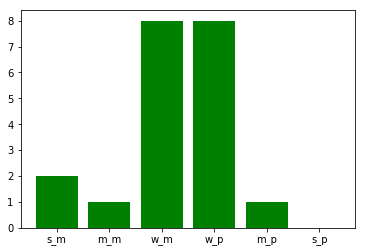

In [13]:
cor_dict = {'s_m':0, 'm_m':0, 'w_m':0, 'w_p':0, 'm_p':0, 's_p':0}
for key, value in sorted_cor.items():
    if value < -0.7:
        cor_dict['s_m'] += 1
    elif -0.7 <= value and value < -0.4:
        cor_dict['m_m'] += 1
    elif -0.4 <= value and value < 0:
        cor_dict['w_m'] += 1
    elif 0 <= value and value < 0.4:
        cor_dict['w_p'] += 1
    elif 0.4 <= value and value < 0.7:
        cor_dict['m_p'] += 1
    else:
        cor_dict['s_p'] += 1
plt.bar(cor_dict.keys(), cor_dict.values(), color='g')
print(cor_dict)

In [14]:
price = pd.read_csv('./data/onion_price.csv')

path = 'data/onion_supply/onion'
o00 = pd.read_excel('./{}_00.xlsx'.format(path))
o01 = pd.read_excel('./{}_01.xlsx'.format(path))
o02 = pd.read_excel('./{}_02.xlsx'.format(path))
o03 = pd.read_excel('./{}_03.xlsx'.format(path))
o04 = pd.read_excel('./{}_04.xlsx'.format(path))
o05 = pd.read_excel('./{}_05.xlsx'.format(path))
o06 = pd.read_excel('./{}_06.xlsx'.format(path))
o07 = pd.read_excel('./{}_07.xlsx'.format(path))
o08 = pd.read_excel('./{}_08.xlsx'.format(path))
o09 = pd.read_excel('./{}_09.xlsx'.format(path))
o10 = pd.read_excel('./{}_10.xlsx'.format(path))
o11 = pd.read_excel('./{}_11.xlsx'.format(path))
o12 = pd.read_excel('./{}_12.xlsx'.format(path))
o13 = pd.read_excel('./{}_13.xlsx'.format(path))
o14 = pd.read_excel('./{}_14.xlsx'.format(path))
o15 = pd.read_excel('./{}_15.xlsx'.format(path))
o16 = pd.read_excel('./{}_16.xlsx'.format(path))
o17 = pd.read_excel('./{}_17.xlsx'.format(path))
o18 = pd.read_excel('./{}_18.xlsx'.format(path))
o19 = pd.read_excel('./{}_19.xlsx'.format(path))

onion = pd.concat([o00, o01, o02, o03, o04, o05, o06, o07, o08, o09, o10, o11, o12, o13, o14, o15, o16, o17, o18, o19])
onion['year'] = onion['거래년월일'].apply(lambda x: str(x)[:4]).astype(str)
onion['month'] = onion['거래년월일'].apply(lambda x: str(x)[4:6]).astype(str)
onion['거래량'] = onion['거래량'].apply(lambda x: ''.join(str(x).split(','))).astype(int) 
df = onion[['year', 'month','거래량']]
total = df.groupby(['year','month'], as_index=False).sum()
total = total[:-2]
cat = pd.concat([price, total], axis=1)
result = cat[['year','month','거래량','가격']]
result.groupby('year').corr()

거래량        가격
year                        
2000 거래량  1.000000 -0.048555
     가격  -0.048555  1.000000
2001 거래량  1.000000 -0.614752
     가격  -0.614752  1.000000
2002 거래량  1.000000 -0.800802
     가격  -0.800802  1.000000
2003 거래량  1.000000 -0.148720
     가격  -0.148720  1.000000
2004 거래량  1.000000 -0.701445
     가격  -0.701445  1.000000
2005 거래량  1.000000  0.115732
     가격   0.115732  1.000000
2006 거래량  1.000000 -0.411398
     가격  -0.411398  1.000000
2007 거래량  1.000000 -0.494498
     가격  -0.494498  1.000000
2008 거래량  1.000000 -0.432081
     가격  -0.432081  1.000000
2009 거래량  1.000000 -0.094541
     가격  -0.094541  1.000000
2010 거래량  1.000000  0.181768
     가격   0.181768  1.000000
2011 거래량  1.000000 -0.729797
     가격  -0.729797  1.000000
2012 거래량  1.000000 -0.538317
     가격  -0.538317  1.000000
2013 거래량  1.000000 -0.162163
     가격  -0.162163  1.000000
2014 거래량  1.000000 -0.602738
     가격  -0.602738  1.000000
2015 거래량  1.000000 -0.707700
     가격  -0.707700  1.000000
2016 거래량  1.000000 -0.335356
     가격  -0.335356  1.000000
2017 거래량  1.000000 -0.694133
     가격  -0.694133  1.000000
2018 거래량  1.000000 -0.436600
     가격  -0.436600  1.000000
2019 거래량  1.000000  0.043307
     가격   0.043307  1.000000

In [15]:
cor_result = {'2000':-0.485, '2001':-0.614, '2002':-0.800, '2003':-0.148, '2004':-0.701, '2005':0.115, '2006':-0.411,
              '2007':-0.494, '2008':-0.432, '2009':-0.094, '2010':0.181,'2011':-0.729,'2012':-0.538,'2013':-0.162,
              '2014':-0.602,'2015':-0.707,'2016':-0.335,'2017':-0.694,'2018':-0.436,'2019':0.043}
cor_result

{'2000': -0.485,
 '2001': -0.614,
 '2002': -0.8,
 '2003': -0.148,
 '2004': -0.701,
 '2005': 0.115,
 '2006': -0.411,
 '2007': -0.494,
 '2008': -0.432,
 '2009': -0.094,
 '2010': 0.181,
 '2011': -0.729,
 '2012': -0.538,
 '2013': -0.162,
 '2014': -0.602,
 '2015': -0.707,
 '2016': -0.335,
 '2017': -0.694,
 '2018': -0.436,
 '2019': 0.043}

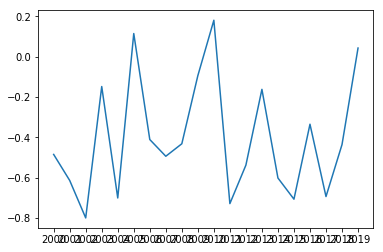

In [16]:
dates = list(cor_result.keys())          
prices = list(cor_result.values())       
plt.plot_date(dates, prices, '-') 

In [17]:
sorted_cor = {k: v for k, v in sorted(cor_result.items(), key=lambda item: item[1])}
sorted_cor

{'2002': -0.8,
 '2011': -0.729,
 '2015': -0.707,
 '2004': -0.701,
 '2017': -0.694,
 '2001': -0.614,
 '2014': -0.602,
 '2012': -0.538,
 '2007': -0.494,
 '2000': -0.485,
 '2018': -0.436,
 '2008': -0.432,
 '2006': -0.411,
 '2016': -0.335,
 '2013': -0.162,
 '2003': -0.148,
 '2009': -0.094,
 '2019': 0.043,
 '2005': 0.115,
 '2010': 0.181}

{'s_m': 4, 'm_m': 9, 'w_m': 4, 'w_p': 3, 'm_p': 0, 's_p': 0}


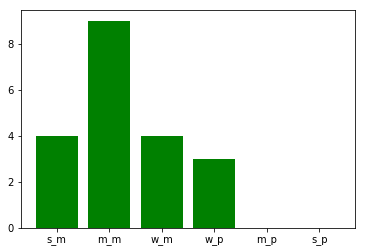

In [18]:
cor_dict = {'s_m':0, 'm_m':0, 'w_m':0, 'w_p':0, 'm_p':0, 's_p':0}
for key, value in sorted_cor.items():
    if value < -0.7:
        cor_dict['s_m'] += 1
    elif -0.7 <= value and value < -0.4:
        cor_dict['m_m'] += 1
    elif -0.4 <= value and value < 0:
        cor_dict['w_m'] += 1
    elif 0 <= value and value < 0.4:
        cor_dict['w_p'] += 1
    elif 0.4 <= value and value < 0.7:
        cor_dict['m_p'] += 1
    else:
        cor_dict['s_p'] += 1
plt.bar(cor_dict.keys(), cor_dict.values(), color='g')
print(cor_dict)